In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import ruamel.yaml as yaml

In [4]:
# Plot Region Proposal

region_proposal_path = Path("./evaluate_region_proposal_all_700.yaml")

loaded = yaml.load(region_proposal_path.read_text(), Loader=yaml.RoundTripLoader)
 
ious = {} # beast: [[ious]]

beast_counts = {}

for image_data in loaded.values():
    beast_counts[image_data["beast"]] = beast_counts.get(image_data["beast"], 0) + 1
    current = ious.get(image_data["beast"], [])
    iou = image_data.get("iou")
    if iou is None:
        continue
    
    current.extend(i[0] for i in iou)
    ious[image_data["beast"]] = current


counts = {
    beast: len(iou)
    for beast, iou in ious.items()
}

averages = {
    beast: sum(iou) / counts[beast]
    for beast, iou in ious.items()
}


# print(averages)

standard_deviations = {
    beast: sum(
        [(i - averages[beast]) ** 2 for i in iou] 
    ) / counts[beast]
    for beast, iou in ious.items()
}

# print(standard_deviation)

for beast in ious.keys():
    print(f"{beast}: Count: {beast_counts[beast]} Average {averages[beast]:.3f} Standard Deviation {standard_deviations[beast]:.3f} Num Regions: {counts[beast]/beast_counts[beast]:.2f}")

# sum_variance_squared = 0
# for iou in ious:
#     for percentage, _ in iou:
#         sum_variance_squared += (percentage - average) ** 2

# standard_deviation = sum_variance_squared / count
# print(f"{average:.2f}")
# print(f"{standard_deviation:.2f}")
        

pegasus: Count: 727 Average 0.196 Standard Deviation 0.050 Num Regions: 172.67
harpy: Count: 323 Average 0.201 Standard Deviation 0.048 Num Regions: 192.92
minotaur: Count: 578 Average 0.220 Standard Deviation 0.055 Num Regions: 175.82


In [42]:
# Plot Region Proposal

region_proposal_paths = {
    100: Path("./evaluate_region_proposal_all_100.yaml"),
    300: Path("./evaluate_region_proposal_all_300.yaml"),
    500: Path("./evaluate_region_proposal_all_500.yaml"),
    700: Path("./evaluate_region_proposal_all_700.yaml"),
    900: Path("./evaluate_region_proposal_all_900.yaml"),
    1100: Path("./evaluate_region_proposal_all_1100.yaml"),
    1300: Path("./evaluate_region_proposal_all_1300.yaml"),
    1500: Path("./evaluate_region_proposal_all_1500.yaml"),
    2000: Path("./evaluate_region_proposal_all_2000.yaml"),
    3000: Path("./evaluate_region_proposal_all_3000.yaml"),
    4000: Path("./evaluate_region_proposal_all_4000.yaml"),
    5000: Path("./evaluate_region_proposal_all_5000.yaml"),
#     6000: Path("./evaluate_region_proposal_all_6000.yaml"),
#     7000: Path("./evaluate_region_proposal_all_7000.yaml"),
#     8000: Path("./evaluate_region_proposal_all_8000.yaml"),
#     9000: Path("./evaluate_region_proposal_all_9000.yaml"),
#     10000: Path("./evaluate_region_proposal_all_10000.yaml"),
}

results = {}
for min_size, region_proposal_path in region_proposal_paths.items():

    loaded = yaml.load(region_proposal_path.read_text(), Loader=yaml.RoundTripLoader)

    ious = {} # beast: [[ious]]

    beast_counts = {}

    for image_data in loaded.values():
        beast_counts[image_data["beast"]] = beast_counts.get(image_data["beast"], 0) + 1
        current = ious.get(image_data["beast"], [])
        iou = image_data.get("iou")
        if iou is None:
            continue

        current.extend(i[0] for i in iou)
        ious[image_data["beast"]] = current


    counts = {
        beast: len(iou)
        for beast, iou in ious.items()
    }

    averages = {
        beast: sum(iou) / counts[beast]
        for beast, iou in ious.items()
    }


    # print(averages)

    standard_deviations = {
        beast: sum(
            [(i - averages[beast]) ** 2 for i in iou] 
        ) / counts[beast]
        for beast, iou in ious.items()
    }

    # print(standard_deviation)
    results[min_size] = {}
    for beast in ious.keys():
        results[min_size][beast] = {
            "img_count": beast_counts[beast],
            "average": averages[beast],
            "std_dev": standard_deviations[beast],
            "avg_num_regions": counts[beast]/beast_counts[beast]
        }
        print(f"{beast}: Count: {beast_counts[beast]} Average {averages[beast]:.3f} Standard Deviation {standard_deviations[beast]:.3f} Num Regions: {counts[beast]/beast_counts[beast]:.2f}")

for min_size, result in results.items():
    print(min_size)
    print(result)

pegasus: Count: 727 Average 0.196 Standard Deviation 0.050 Num Regions: 172.67
harpy: Count: 323 Average 0.201 Standard Deviation 0.048 Num Regions: 192.92
minotaur: Count: 578 Average 0.220 Standard Deviation 0.055 Num Regions: 175.82
pegasus: Count: 727 Average 0.230 Standard Deviation 0.052 Num Regions: 79.16
harpy: Count: 323 Average 0.240 Standard Deviation 0.049 Num Regions: 86.06
minotaur: Count: 578 Average 0.259 Standard Deviation 0.056 Num Regions: 84.33
pegasus: Count: 727 Average 0.268 Standard Deviation 0.056 Num Regions: 49.46
harpy: Count: 323 Average 0.263 Standard Deviation 0.050 Num Regions: 59.05
minotaur: Count: 578 Average 0.282 Standard Deviation 0.057 Num Regions: 56.79
pegasus: Count: 727 Average 0.285 Standard Deviation 0.057 Num Regions: 38.13
harpy: Count: 323 Average 0.276 Standard Deviation 0.050 Num Regions: 45.70
minotaur: Count: 578 Average 0.298 Standard Deviation 0.057 Num Regions: 44.51
pegasus: Count: 727 Average 0.300 Standard Deviation 0.058 Num Re

[100, 300, 500, 700, 900, 1100, 1300, 1500, 2000, 3000, 4000, 5000]


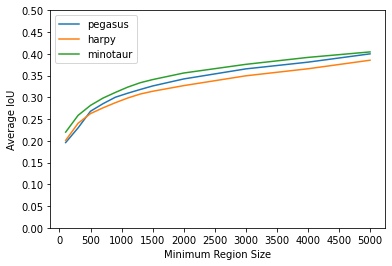

In [43]:
import matplotlib.pyplot as plt

x = list(results.keys())
print(x)

ys = [[], [], []]
errors = [[], [], []]
beasts = ["pegasus", "harpy", "minotaur"]

for data in results.values():
    for index, value in enumerate(data.values()):
        ys[index].append(value['average'])
        errors[index].append(value['std_dev'])


for y, error, label in zip(ys, errors, beasts):
    plt.plot(x, y, label=label) #, yerr=error)


y_ticks = []
val = 0
while val <= 0.5:
    y_ticks.append(val)
    val += 0.05

plt.ylabel("Average IoU")
plt.xlabel("Minimum Region Size")
plt.legend(loc='upper left')
plt.yticks(y_ticks)
plt.xticks(list(range(0, max(x)+1, 500)))
plt.show()

